In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DataScienceProject')
import pandas as pd
import numpy as np
from Packages.QC import QC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('Clean data/data_cleaned.csv')
QC(data).qc()

,Example,Type,N_rows,Missing values,Unique values,Most frequent,Second most frequent,Third most frequent,25th percentile,50th percentile,75th percentile,Maximum value,Minimum value,Standard deviation
Alaska Field Production of Crude Oil (Thousand Barrels),38746.0,float64,435,0,430,30704.0,14922.0,13379.0,16044.5,27466.5,44700.5,64668.0,10829.0,15836.993172
"Cushing, OK WTI Crude oil Spot Price FOB (Dollars per Barrel)",66.25,float64,435,0,414,21.33,94.51,19.66,20.06,36.04,65.92,133.88,11.35,29.41674
Date,Oct-03,object,435,0,435,All unique values,All unique values,All unique values,NaN,NaN,NaN,NaN,NaN,NaN
Europe Brent Spot Price FOB (Dollars per Barrel),18.58,float64,435,0,414,38.11,18.46,22.76,19.08,38.11,68.845,132.72,9.82,32.468549
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),1.62,float64,435,0,377,0.511,0.621,0.593,0.587,1.058,1.966,4.082,0.307,0.850602
U.S. Field Production of Crude Oil (Thousand Barrels),168706.0,float64,435,0,435,All unique values,All unique values,All unique values,174066.5,202610.0,256771.0,402314.0,119208.0,62094.041084
U.S. Imports of Crude Oil (Thousand Barrels),249788.0,float64,435,0,435,All unique values,All unique values,All unique values,198274.5,238979.5,277869.0,327476.0,108260.0,50300.9406
U.S. Percent of Crude Oil Stocks Held in SPR (Percent),58.1,float64,435,0,149,63.8,68.0,63.5,61.3,63.8,67.3,72.2,52.5,3.914855
U.S. Percent of Total Petroleum Stocks Held in SPR (Percent),40.3,float64,435,0,108,34.1,34.0,35.5,34.5,36.0,39.5,42.8,27.8,2.919505


#Model ready data

##Outlier treatment

#From boxplot, 'U.S. Field Production of Crude Oil (Thousand Barrels)' column seems to have outliers on the upper bound


In [ ]:
ot = data[' U.S. Field Production of Crude Oil (Thousand Barrels) '] 
ot75 = np.percentile(ot, 75)
ot25 = np.percentile(ot, 25)
ot = np.where(ot>ot75+1.5*(ot75-ot25),ot75+1.5*(ot75-ot25),ot)

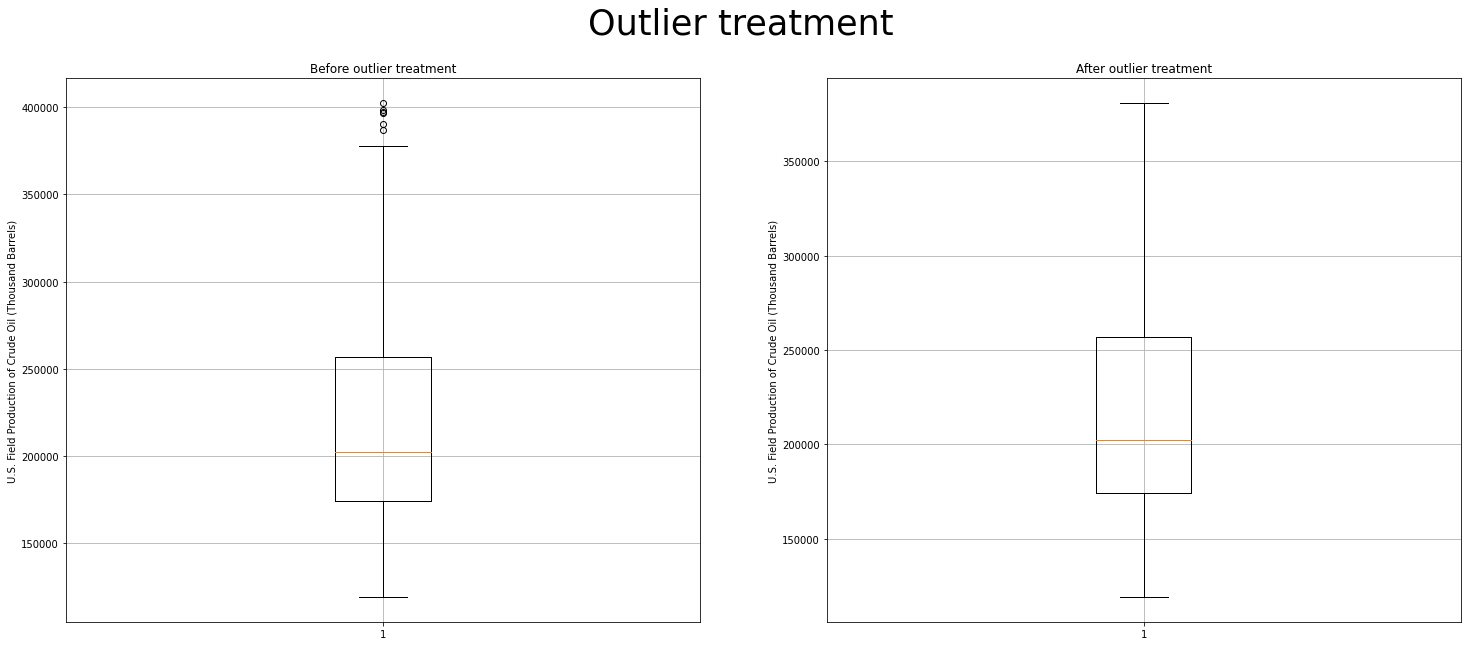

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.grid()
plt.boxplot(data[' U.S. Field Production of Crude Oil (Thousand Barrels) '])
plt.ylabel('U.S. Field Production of Crude Oil (Thousand Barrels)')
plt.title('Before outlier treatment')
plt.subplot(1,2,2)
plt.grid()
plt.boxplot(ot)
plt.ylabel('U.S. Field Production of Crude Oil (Thousand Barrels)')
plt.title('After outlier treatment')
plt.suptitle('Outlier treatment',fontsize=35)
plt.savefig('Results/Visualizations/7.Outlier_treatment.png')
plt.show()

In [ ]:
data[' U.S. Field Production of Crude Oil (Thousand Barrels) '] = ot

##Train test split

In [ ]:
x = data.drop(columns=[' Date ',' New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon) '],axis=1)
y = data[' New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon) ']

In [ ]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=666)
print(f'The entire dataset is now split into training and testing set in 80:20 ratio with\nTraining set deimension x_tr = {x_tr.shape}, y_tr = {y_tr.shape}\nTesting set dimension x_te = {x_te.shape}, y_te = {y_te.shape}')

The entire dataset is now split into training and testing set in 80:20 ratio with
Training set deimension x_tr = (348, 7), y_tr = (348,)
Testing set dimension x_te = (87, 7), y_te = (87,)


##Scale independent training and testing set

In [ ]:
nm = MinMaxScaler().fit(x_tr)

In [ ]:
x_tr.to_csv('Model ready data/x_train.csv',index=False)
x_te.to_csv('Model ready data/x_test.csv',index=False)
x_tr_nm = nm.transform(x_tr)
pd.DataFrame(x_tr_nm,columns=x_tr.columns).to_csv('Model ready data/x_train_norm.csv',index=False)
x_te_nm = nm.transform(x_te)
pd.DataFrame(x_te_nm,columns=x_tr.columns).to_csv('Model ready data/x_test_norm.csv',index=False)
pd.DataFrame(y_tr).to_csv('Model ready data/y_train.csv',index=False)
pd.DataFrame(y_te).to_csv('Model ready data/y_test.csv',index=False)